In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [3]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [4]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [6]:
discriminator = Discriminator()

In [7]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [8]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [9]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [10]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")


Epoch: 0 Loss D.: 0.15663041174411774
Epoch: 0 Loss G.: 2.1256043910980225
Epoch: 10 Loss D.: 0.6571139693260193
Epoch: 10 Loss G.: 0.8178414106369019
Epoch: 20 Loss D.: 0.6383627653121948
Epoch: 20 Loss G.: 0.9057258367538452
Epoch: 30 Loss D.: 0.5879160761833191
Epoch: 30 Loss G.: 0.7484802603721619
Epoch: 40 Loss D.: 0.5586228370666504
Epoch: 40 Loss G.: 1.01658034324646
Epoch: 50 Loss D.: 0.6439600586891174
Epoch: 50 Loss G.: 0.750975489616394
Epoch: 60 Loss D.: 0.8144655823707581
Epoch: 60 Loss G.: 0.5160590410232544
Epoch: 70 Loss D.: 0.7321587800979614
Epoch: 70 Loss G.: 0.7114300727844238
Epoch: 80 Loss D.: 0.7137088775634766
Epoch: 80 Loss G.: 0.6991386413574219
Epoch: 90 Loss D.: 0.6631389856338501
Epoch: 90 Loss G.: 0.7840858697891235
Epoch: 100 Loss D.: 0.6799262762069702
Epoch: 100 Loss G.: 0.7404754757881165
Epoch: 110 Loss D.: 0.7509774565696716
Epoch: 110 Loss G.: 0.7696004509925842
Epoch: 120 Loss D.: 0.7215709090232849
Epoch: 120 Loss G.: 0.7273547053337097
Epoch: 130

In [11]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

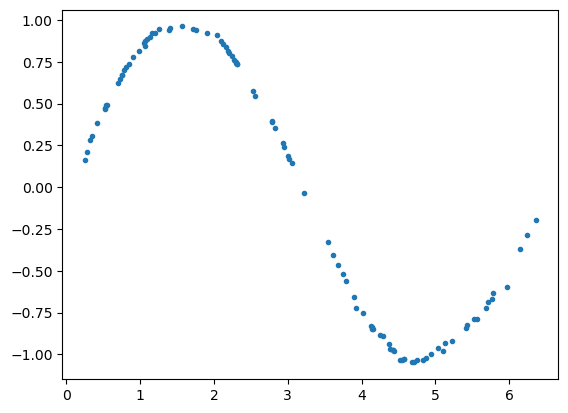

In [12]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

In [15]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

ImportError: cannot import name 'PILLOW_VERSION' from 'PIL' (/Users/randyllpandohie/opt/anaconda3/envs/tensorflow_py/lib/python3.8/site-packages/PIL/__init__.py)